# Haar Cascade


Deteksi Objek menggunakan Haar feature-based cascade classifiers adalah metode deteksi objek efektif yang diusulkan oleh Paul Viola dan Michael Jones dalam [paper](https://www.cs.cmu.edu/~efros/courses/LBMV07/Papers/viola-cvpr-01.pdf) dan ditingkatkan kemudian oleh [Rainer Lienhart](http://wiki.opencv.org.cn/images/5/52/MRL-TR-May02-revised-Dec02.pdf).

OpenCV menyediakan ([Cascade Classifier ](https://docs.opencv.org/3.4/dc/d88/tutorial_traincascade.html))) yang dapat diimplementasikan dengan menggunakan fungsi cv2.CascadeClassifierload. Model tersebut dapat ditemukan [di sini](https://github.com/opencv/opencv/tree/3.4/data).

Referensi lebih lanjut bisa baca [di sini](https://docs.opencv.org/3.4/db/d28/tutorial_cascade_classifier.html).


Library yang dibutuhkan :


1.   OpenCV
2.   numpy
3.   Matplotlib dan pylab



In [ ]:
# Download the test image and utils files
!wget --no-check-certificate \
    https://res.klook.com/images/fl_lossy.progressive,q_65/c_fill,w_1350,h_1080,f_auto/w_80,x_15,y_15,g_south_west,l_klook_water/activities/qupuw4hgkhwuaijbjlvp/FamilyPortraitExperiencedariZ-anddiSeoul.jpg \
    -O Potrait.jpg
!wget --no-check-certificate \
    https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/haarcascade_frontalface_default.xml \
    -O haarcascade_frontalface_default.xml
!wget --no-check-certificate \
    https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/haarcascade_smile.xml \
    -O haarcascade_smile.xml
!wget --no-check-certificate \
    https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/haarcascade_eye.xml \
    -O haarcascade_eye.xml
!wget --no-check-certificate \
    https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/utils/common.py \
    -O common.py

# these imports let you use opencv
import cv2 #opencv itself
import common #some useful opencv functions
import numpy as np # matrix manipulations

#the following are to do with this interactive notebook code
%matplotlib inline 
from matplotlib import pyplot as plt # this lets you draw inline pictures in the notebooks
import pylab # this allows you to control figure size 
pylab.rcParams['figure.figsize'] = (10.0, 8.0) # this controls figure size in the notebook

--2021-11-15 21:07:47--  https://res.klook.com/images/fl_lossy.progressive,q_65/c_fill,w_1350,h_1080,f_auto/w_80,x_15,y_15,g_south_west,l_klook_water/activities/qupuw4hgkhwuaijbjlvp/FamilyPortraitExperiencedariZ-anddiSeoul.jpg
Resolving res.klook.com (res.klook.com)... 108.156.83.20, 108.156.83.11, 108.156.83.56, ...
Connecting to res.klook.com (res.klook.com)|108.156.83.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 112296 (110K) [image/jpeg]
Saving to: ‘Potrait.jpg’

Potrait.jpg         100%[===================>] 109.66K  --.-KB/s    in 0.07s   

2021-11-15 21:07:47 (1.43 MB/s) - ‘Potrait.jpg’ saved [112296/112296]

--2021-11-15 21:07:47--  https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.

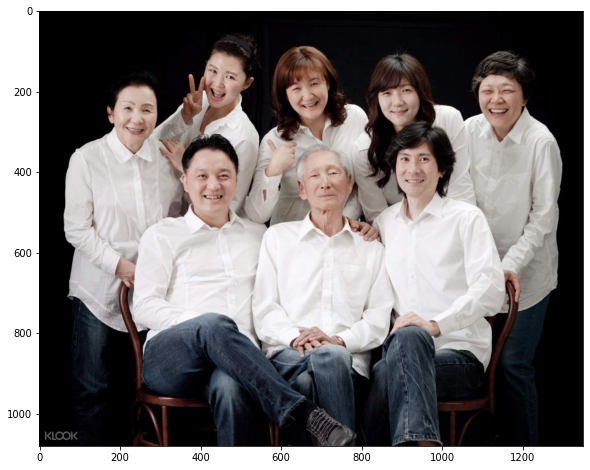

In [ ]:
base_image = cv2.imread('Potrait.jpg')
grey = cv2.cvtColor(base_image, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(base_image, cv2.COLOR_BGR2RGB))

# Face Detection

Untuk Face Detection menggunakan model pre-trained haarcascade_frontalface_default.xml untuk mendeteksi wajah di foto.



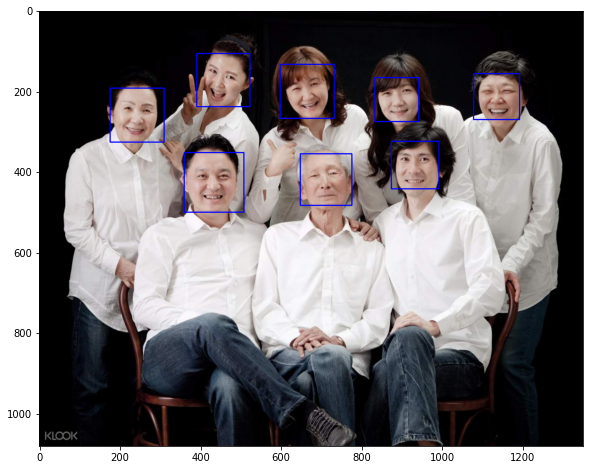

In [ ]:
test_image = cv2.imread('Potrait.jpg')
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(grey, 1.3, 5)
for (x,y,w,h) in faces:
     cv2.rectangle(test_image,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))

## Smile Detection

Menggunakan pre-trained model haarcascade_smile.xml untuk mendeteksi senyum pada gambar.

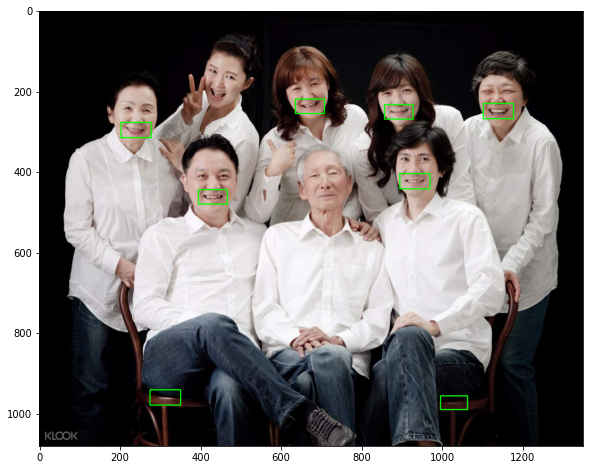

In [ ]:
test_image = cv2.imread('Potrait.jpg')
smile_cascade = cv2.CascadeClassifier('haarcascade_smile.xml')
smiles = smile_cascade.detectMultiScale(grey, 1.3, 20)
for (x,y,w,h) in smiles:
     cv2.rectangle(test_image,(x,y),(x+w,y+h),(0,255,0),2)
plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))

Pada gambar di atas terdapat False Positive, Untuk memperbaikinya deteksi dilakukan di dalam face, dengan melanjutkan kode diatas, berikut kode untuk melakukan smile detection

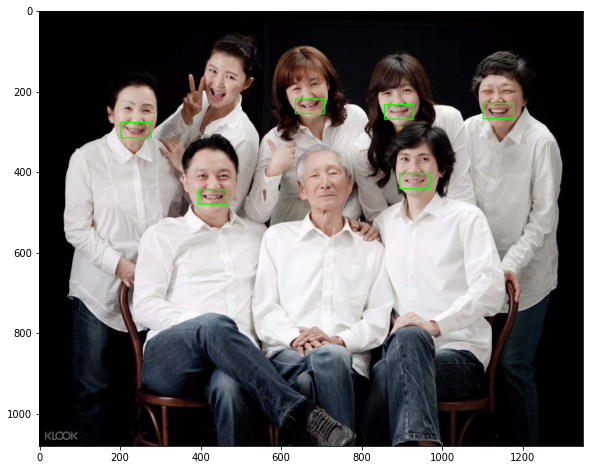

In [ ]:
test_image = cv2.imread('Potrait.jpg')
for (x,y,w,h) in faces:
  for (x_s,y_s,w_s,h_s) in smiles:
    if( (x <= x_s) and (y <= y_s) and ( x+w >= x_s+w_s) and ( y+h >= y_s+h_s)):
      cv2.rectangle(test_image, (x_s,y_s),(x_s+w_s,y_s+h_s),(0,255,0),2)
plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))

# Activity


*   Lakukan eye detection (untuk melihat model bisa melihat https://github.com/opencv/opencv/tree/3.4/data -> folder **haarcascades**


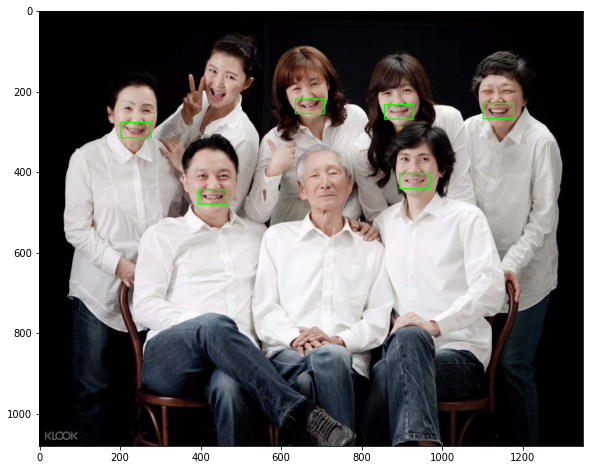

In [ ]:
test_image = cv2.imread('Potrait.jpg')
for (x,y,w,h) in faces:
  for (x_s,y_s,w_s,h_s) in smiles:
    if( (x <= x_s) and (y <= y_s) and ( x+w >= x_s+w_s) and ( y+h >= y_s+h_s)):
      cv2.rectangle(test_image, (x_s,y_s),(x_s+w_s,y_s+h_s),(0,255,0),2)
plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))